[[7.49080238e-01 6.33428778e+00 1.00000000e+00 7.49080238e-01]
 [1.90142861e+00 9.40527849e+00 1.00000000e+00 1.90142861e+00]
 [1.46398788e+00 8.48372443e+00 1.00000000e+00 1.46398788e+00]
 [1.19731697e+00 5.60438199e+00 1.00000000e+00 1.19731697e+00]
 [3.12037281e-01 4.71643995e+00 1.00000000e+00 3.12037281e-01]
 [3.11989041e-01 5.29307969e+00 1.00000000e+00 3.11989041e-01]
 [1.16167224e-01 5.82639572e+00 1.00000000e+00 1.16167224e-01]
 [1.73235229e+00 8.67878666e+00 1.00000000e+00 1.73235229e+00]
 [1.20223002e+00 6.79819647e+00 1.00000000e+00 1.20223002e+00]
 [1.41614516e+00 7.74667842e+00 1.00000000e+00 1.41614516e+00]
 [4.11689886e-02 5.03890908e+00 1.00000000e+00 4.11689886e-02]
 [1.93981970e+00 1.01482102e+01 1.00000000e+00 1.93981970e+00]
 [1.66488528e+00 8.46489564e+00 1.00000000e+00 1.66488528e+00]
 [4.24678221e-01 5.78730210e+00 1.00000000e+00 4.24678221e-01]
 [3.63649934e-01 5.18802735e+00 1.00000000e+00 3.63649934e-01]
 [3.66809020e-01 6.06907205e+00 1.00000000e+00 3.668090

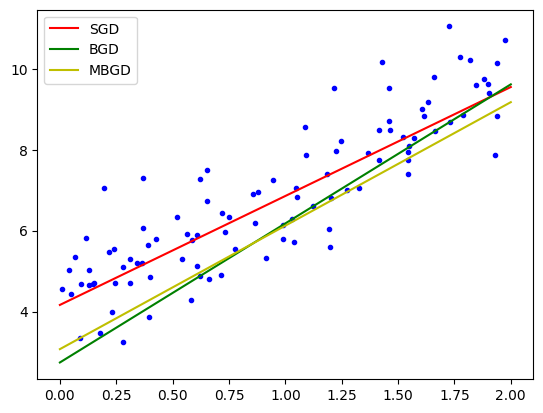

In [1]:
###################################################################################################################################
#Basic optimizers

import numpy as np
import matplotlib.pyplot as plt

#genearate random dataset
np.random.seed(42)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

#add bias term
x_b=np.c_[np.ones((100,1)),x]
data=np.c_[x,y,x_b]
print(data)

################################Stochastic Gradient Decent################################

#stochastic gradient decent
def sgd (x,y,learning_rate=0.01, n_epoch=50):
  m=len(y)
  theta=np.random.randn(2,1)
  print(theta)
  for epoch in range(n_epoch):
    for i in range(m):
      random_index=np.random.randint(m)
      x_i=x[random_index:random_index+1]
      y_i=y[random_index:random_index+1]
      gradient=2*x_i.T.dot(x_i.dot(theta)-y_i)
      theta=theta-learning_rate*gradient
  return theta

theta_sdg=sgd(x_b,y)
print("SDG Theta:",theta_sdg)

################################Batch Gradient Decent################################

#batch gradient decent
def bgd (x,y,learning_rate=0.01, n_epoch=50):
  m=len(y)
  theta=np.random.randn(2,1)
  print(theta)
  for epoch in range(n_epoch):
      gradient=2/m*x.T.dot(x.dot(theta)-y)
      theta=theta-learning_rate*gradient
  return theta

theta_bgd=bgd(x_b,y)
print("BGD Theta:",theta_bgd)

################################Mini Batch Gradient Decent################################

#mini-batch gradient decent
def mbgd (x,y,learning_rate=0.01, n_epoch=50,batch_size=20):
  m=len(y)
  theta=np.random.randn(2,1)
  print(theta)
  for epoch in range(n_epoch):
      shuffled_indices=np.random.permutation(m)
      x_shuffled=x[shuffled_indices]
      y_shuffled=y[shuffled_indices]
      for i in range(0,m,batch_size):
        x_i=x_shuffled[i:i+batch_size]
        y_i=y_shuffled[i:i+batch_size]
      gradient=2/len(x_i)*x_i.T.dot(x_i.dot(theta)-y_i)
      theta=theta-learning_rate*gradient
  return theta

theta_mbgd=mbgd(x_b,y)
print("MBGD Theta:",theta_mbgd)


################################plotting all GD################################
def plot_gd(x,y,theta_sdg,theta_bgd,theta_mbgd):
  plt.plot(x,y,'b.')
  x_new=np.array([[0],[2]])
  x_new_b=np.c_[np.ones((2,1)),x_new]
  n_data=np.c_[x_new,x_new_b]
  print(n_data)
  y_pred_sdg=x_new_b.dot(theta_sdg)
  y_pred_bgd=x_new_b.dot(theta_bgd)
  y_pred_mbgd=x_new_b.dot(theta_mbgd)
  plt.plot(x_new,y_pred_sdg,'r-',label="SGD")
  plt.plot(x_new,y_pred_bgd,'g-',label="BGD")
  plt.plot(x_new,y_pred_mbgd,'y-',label="MBGD")
  plt.legend(loc="upper left")
  plt.show()


plot_gd(x,y,theta_sdg,theta_bgd,theta_mbgd)

###################################################################################################################################